In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

print('Imported')

Imported


In [2]:
data = pd.read_csv('./fakeorereal.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data = data.drop(['Unnamed: 0'],axis=1)
data

,title,text,label
0,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
7813,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
7814,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,FAKE
7815,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
7816,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia â€”President Obama conve...",REAL


In [4]:
data.head()

,title,text,label
0,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
data.tail()

,title,text,label
7813,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
7814,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,FAKE
7815,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
7816,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia â€”President Obama conve...",REAL
7817,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7818 entries, 0 to 7817
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   7185 non-null   object
 1   text    6915 non-null   object
 2   label   6755 non-null   object
dtypes: object(3)
memory usage: 183.4+ KB


In [7]:
data.describe()

,title,text,label
count,7185,6915,6755
unique,7085,6630,437
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3161


In [8]:
data.shape

(7818, 3)

In [9]:
data.nunique()

title    7085
text     6630
label     437
dtype: int64

In [10]:
data.duplicated().sum()

673

In [11]:
data.isnull().sum()

title     633
text      903
label    1063
dtype: int64

In [12]:
data.columns

Index(['title', 'text', 'label'], dtype='object')

In [13]:
data = data[(data['label'] == 'FAKE') | (data['label'] == 'REAL')]

In [14]:
data

,title,text,label
0,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
7813,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
7814,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,FAKE
7815,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
7816,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia â€”President Obama conve...",REAL


In [15]:
data = data[(data['title'] != '') & (data['text'] != '')]

In [16]:
data

,title,text,label
0,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
7813,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
7814,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,FAKE
7815,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
7816,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia â€”President Obama conve...",REAL


In [17]:
data.isnull().sum()

title    0
text     1
label    0
dtype: int64

In [18]:
null_data = data[data.isnull().any(axis=1)]
null_data

,title,text,label
5693,Israel: Ancient Papyrus Proves Jerusalem Belon...,NaN,FAKE


In [19]:
data = data.drop([5693])

In [20]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

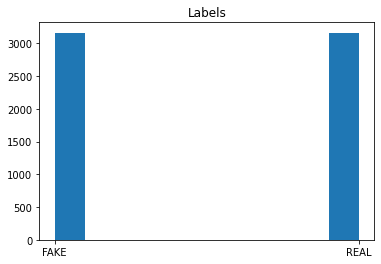

In [21]:
plt.hist(data['label'],bins=10)
plt.title('Labels')
plt.show()

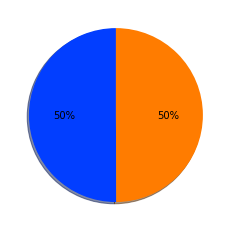

In [22]:
colors = sns.color_palette('bright')
plt.pie(data['label'].value_counts(), colors = colors, autopct = '%0.0f%%', shadow = 'True', startangle = 90,)
plt.show()

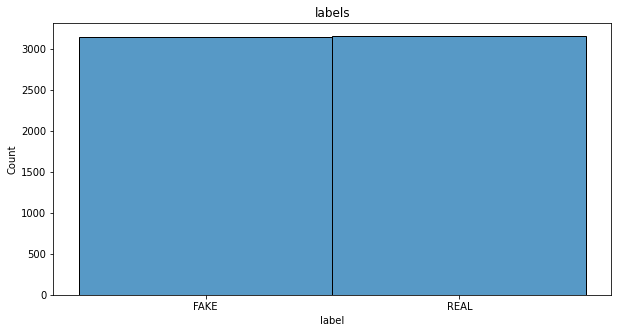

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data['label'],bins=10)
plt.title('labels')
plt.show()

In [24]:
data['total_count_words'] = data['text'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print('total_words:',total_words)
count = 0
for y in data['text']:
    count = count+1
print("count:",count)
average_word = total_words/count
print("average length:",average_word)

0       1296
1        446
2        431
3        404
4        317
        ... 
7813     642
7814    2183
7815    1947
7816    1120
7817     825
Name: total_count_words, Length: 6314, dtype: int64
total_words: 4711750
count: 6314
average length: 746.238517579981


In [25]:
data['total_length_characters'] = data['text'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print('total_length_characters:',total_length_characters)
count = 0
for y in data['text']:
    count = count+1
print("count:",count)
average_length = total_length_characters/count
print("average length:",average_length)

0        7598
1        2676
2        2567
3        2696
4        1840
        ...  
7813     4079
7814    14665
7815    12009
7816     7114
7817     4826
Name: total_length_characters, Length: 6314, dtype: int64
total_length_characters: 28910847
count: 6314
average length: 4578.8481152993345


In [26]:
data['total_count_words'] = data['title'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print('total_words:',total_words)
count = 0
for y in data['title']:
    count = count+1
print("count:",count)
average_word = total_words/count
print("average length:",average_word)

0        5
1       14
2        9
3       15
4        9
        ..
7813    11
7814    10
7815     9
7816    11
7817    10
Name: total_count_words, Length: 6314, dtype: int64
total_words: 66290
count: 6314
average length: 10.498891352549888


In [27]:
data['total_length_characters'] = data['title'].str.len()
print(data['total_length_characters'])
total_length_characters = data['total_length_characters'].sum()
print('total_length_characters:',total_length_characters)
count = 0
for y in data['title']:
    count = count+1
print("count:",count)
average_length = total_length_characters/count
print("average length:",average_length)

0       30
1       85
2       43
3       84
4       48
        ..
7813    69
7814    71
7815    66
7816    67
7817    61
Name: total_length_characters, Length: 6314, dtype: int64
total_length_characters: 417640
count: 6314
average length: 66.14507443775736


In [28]:
import string
import re
import nltk
import pandas as pd
import numpy as np
from nltk.util import pr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
import warnings
warnings.filterwarnings('ignore')

print('Completed')

Completed


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
data.head()

,title,text,label,total_count_words,total_length_characters
0,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,5,30
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,14,85
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,9,43
3,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE,15,84
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,9,48


In [30]:
data.tail()

,title,text,label,total_count_words,total_length_characters
7813,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,11,69
7814,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,The â€˜Pâ€™ in PBS Should Stand for â€˜Plutocr...,FAKE,10,71
7815,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,9,66
7816,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia â€”President Obama conve...",REAL,11,67
7817,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL,10,61


In [31]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\}]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('â€™','',text)
    text=re.sub('â€˜','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['title']=data['title'].apply(clean)
print(data['title'])

0                                      smell hillari fear
1       watch exact moment paul ryan commit polit suic...
2                           kerri go pari gestur sympathi
3          berni support twitter erupt anger dnc tri warn
4                           battl new york primari matter
                              ...                        
7813    state depart say cant find email clinton speci...
7814                       p pbs stand plutocrat pentagon
7815         antitrump protest tool oligarchi      inform
7816    ethiopia obama seek progress peac secur east a...
7817             jeb bush sudden attack trump here matter
Name: title, Length: 6314, dtype: object


In [32]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\}]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('â€™','',text)
    text=re.sub('â€˜','',text)
    text=re.sub('â€”','',text)
    text=re.sub('â','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['text']=data['text'].apply(clean)
print(data['text'])

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       us secretari state john f kerri said monday st...
3        kayde king kaydeek novemb   lesson tonight de...
4       primari day new york frontrunn hillari clinton...
                              ...                        
7813    state depart told republican nation committe c...
7814    p pbs stand plutocrat pentagon post oct    wik...
7815     antitrump protest tool oligarchi “reform alwa...
7816    addi ababa ethiopia presid obama conven meet l...
7817    jeb bush sudden attack trump here mattersjeb b...
Name: text, Length: 6314, dtype: object


In [33]:
data['total_count_words'] = data['text'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print('total_words:',total_words)
count = 0
for y in data['text']:
    count = count+1
print("count:",count)
average_word = total_words/count
print("average length:",average_word)

0        680
1        236
2        240
3        237
4        176
        ... 
7813     376
7814    1311
7815    1036
7816     650
7817     462
Name: total_count_words, Length: 6314, dtype: int64
total_words: 2622022
count: 6314
average length: 415.2711434906557


In [34]:
data['total_count_words'] = data['title'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print('total_words:',total_words)
count = 0
for y in data['title']:
    count = count+1
print("count:",count)
average_word = total_words/count
print("average length:",average_word)

0        3
1       11
2        5
3        8
4        5
        ..
7813     8
7814     5
7815     5
7816     8
7817     7
Name: total_count_words, Length: 6314, dtype: int64
total_words: 46586
count: 6314
average length: 7.378207158694964


In [35]:
data.head()

,title,text,label,total_count_words,total_length_characters
0,smell hillari fear,daniel greenfield shillman journal fellow free...,FAKE,3,30
1,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...,FAKE,11,85
2,kerri go pari gestur sympathi,us secretari state john f kerri said monday st...,REAL,5,43
3,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb lesson tonight de...,FAKE,8,84
4,battl new york primari matter,primari day new york frontrunn hillari clinton...,REAL,5,48


In [36]:
data = data[['title','text','label']]

In [37]:
data.head()

,title,text,label
0,smell hillari fear,daniel greenfield shillman journal fellow free...,FAKE
1,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...,FAKE
2,kerri go pari gestur sympathi,us secretari state john f kerri said monday st...,REAL
3,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb lesson tonight de...,FAKE
4,battl new york primari matter,primari day new york frontrunn hillari clinton...,REAL


In [38]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [39]:
x.shape

(6314, 2)

In [40]:
x

array([['smell hillari fear',
        'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word €œunprecedented€\x9d thrown around often elect ought retir still unpreced nomine major polit parti go war fbi that exact hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump wouldnt surpris clinton alli start run attack ad fbi fbis leadership warn entir leftw establish form lynch mob continu go hillari fbis credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin €œjame comey role recal hoover fbi fair not€\x9d practic admit front spout nonsens boston globe publish column

In [41]:
y.shape

(6314,)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
mat_body = cv.fit_transform(x[:,1]).todense()

In [43]:
mat_body

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
cv_head = CountVectorizer(max_features=5000)
mat_head = cv_head.fit_transform(x[:,0]).todense()

In [45]:
mat_head

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
x_mat = np.hstack((mat_head,mat_body))

In [47]:
x_mat.shape

(6314, 10000)

In [48]:
y.shape

(6314,)

In [49]:
X_train,X_test,y_train,y_test=train_test_split(x_mat,y,test_size=0.33,random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.79      0.83      0.81      1027
        REAL       0.83      0.79      0.81      1057

    accuracy                           0.81      2084
   macro avg       0.81      0.81      0.81      2084
weighted avg       0.81      0.81      0.81      2084



In [53]:
print("Training Accuracy:",clf.score(X_train,y_train))
print("Testing Accuracy:",clf.score(X_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8104606525911708


In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
print("Training Accuracy:",classifier.score(X_train,y_train))
print("Testing Accuracy:",classifier.score(X_test,y_test))

Training Accuracy: 0.9947990543735225
Testing Accuracy: 0.8589251439539347


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        FAKE       0.82      0.91      0.86      1027
        REAL       0.90      0.81      0.85      1057

    accuracy                           0.86      2084
   macro avg       0.86      0.86      0.86      2084
weighted avg       0.86      0.86      0.86      2084



In [58]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

In [59]:
print("Training Accuracy:",log.score(X_train,y_train))
print("Testing Accuracy:",log.score(X_test,y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9285028790786948
